In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Load the stock price data
data = pd.read_csv('upload_DJIA_table.csv')
prices = data['Close'].values.reshape(-1, 1)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
print(prices)

[[17949.369141]
 [17929.990234]
 [17694.679688]
 ...
 [11642.469727]
 [11782.349609]
 [11734.320312]]


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(prices)

In [ ]:

# Split the data into training and testing sets
train_size = int(len(normalized_prices) * 0.8)
train_data = normalized_prices[:train_size]
test_data = normalized_prices[train_size:]

In [ ]:
# Function to create a sliding window of data
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Define the window size and create the sliding windows of data
window_size = 20
X_train, y_train = create_sliding_window(train_data, window_size)
X_test, y_test = create_sliding_window(test_data, window_size)

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(window_size, 1)),
    Dense(1)
])


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
50/50 [==============================] - 3s 10ms/step - loss: 0.1168
Epoch 2/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0021
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 8.6881e-04
Epoch 4/50
50/50 [==============================] - 1s 12ms/step - loss: 5.4506e-04
Epoch 5/50
50/50 [==============================] - 1s 16ms/step - loss: 5.0635e-04
Epoch 6/50
50/50 [==============================] - 1s 16ms/step - loss: 5.0598e-04
Epoch 7/50
50/50 [==============================] - 1s 18ms/step - loss: 4.9294e-04
Epoch 8/50
50/50 [==============================] - 1s 12ms/step - loss: 4.8893e-04
Epoch 9/50
50/50 [==============================] - 1s 10ms/step - loss: 4.9381e-04
Epoch 10/50
50/50 [==============================] - 1s 10ms/step - loss: 4.8662e-04
Epoch 11/50
50/50 [==============================] - 1s 10ms/step - loss: 4.9223e-04
Epoch 12/50
50/50 [==============================] - 1s 11ms/step - loss: 4.7763e-

In [ ]:
# Evaluate the model on the testing data
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Training loss: {train_loss:.4f}")
print(f"Testing loss: {test_loss:.4f}")


Training loss: 0.6868
Testing loss: 0.0809


In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 4ms/step


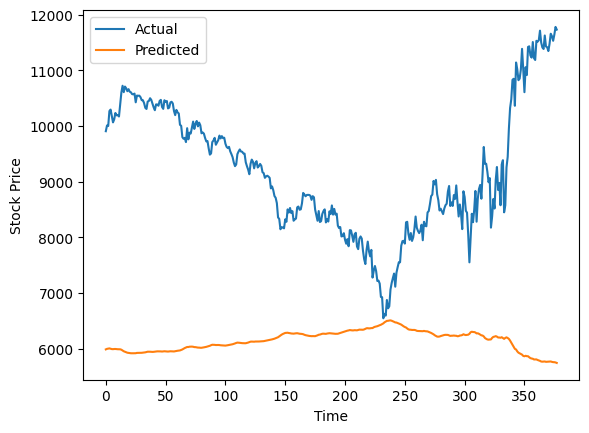

In [ ]:
# Rescale the data back to the original range
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Plot the actual and predicted prices
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()